** Some Theory **

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [30]:
df = pd.read_csv('data.csv')
df.drop('country', axis=1, inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [31]:
df = df - np.mean(df,axis=0)
df = df / np.std(df,axis=0)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [32]:


def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [33]:
def cluster_distance(cluster1, cluster2, X, linkage="single"):
    distances = []

    for i in cluster1:
        for j in cluster2:
            distances.append(euclidean_distance(X[i], X[j]))

    if linkage == "single":
        return min(distances)
    elif linkage == "complete":
        return max(distances)
    elif linkage == "average":
        return np.mean(distances)
    else:
        raise ValueError("Invalid linkage")


In [34]:
def hierarchical_clustering(X, linkage="single"):
    n = len(X)

    
    clusters = [{i} for i in range(n)]
    history = [] 

    while len(clusters) > 1:
        min_dist = float("inf")
        pair = None

       
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], X, linkage)
                if dist < min_dist:
                    min_dist = dist
                    pair = (i, j)

        i, j = pair
        new_cluster = clusters[i].union(clusters[j])

        history.append((clusters[i], clusters[j], min_dist))

       
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

    return history


In [35]:
def cut_tree(history, n_samples, k):
    clusters = [{i} for i in range(n_samples)]

    for c1, c2, _ in history:
        if len(clusters) <= k:
            break

       
        i = next(idx for idx, c in enumerate(clusters) if c1 & c)
        j = next(idx for idx, c in enumerate(clusters) if c2 & c)

        if i != j:
            clusters[i] = clusters[i].union(clusters[j])
            clusters.pop(j)

    labels = np.zeros(n_samples, dtype=int)
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            labels[point] = idx

    return labels


In [36]:
X = df.values 
history = hierarchical_clustering(X, linkage="average")

labels = cut_tree(history, len(X), k=3)
df["cluster"] = labels


In [37]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

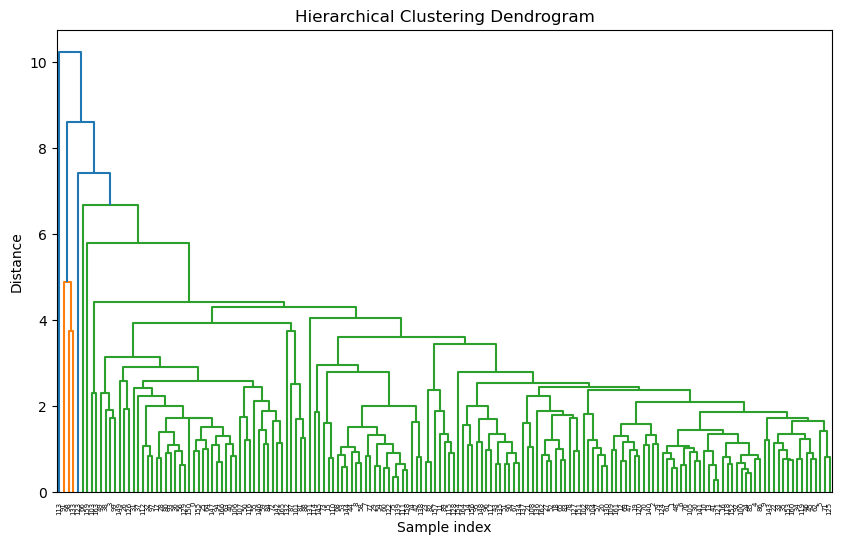

In [38]:


def history_to_linkage(history, n_samples):
    node_id = {frozenset([i]): i for i in range(n_samples)}
    counts = {frozenset([i]): 1 for i in range(n_samples)}
    Z = []
    next_id = n_samples

    for c1, c2, dist in history:
        f1 = frozenset(c1)
        f2 = frozenset(c2)
        i = node_id[f1]
        j = node_id[f2]
        count = counts[f1] + counts[f2]
        Z.append([i, j, dist, count])
        merged = f1 | f2
        node_id[merged] = next_id
        counts[merged] = count
        next_id += 1

    return np.array(Z, dtype=float)

Z = history_to_linkage(history, len(X))

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

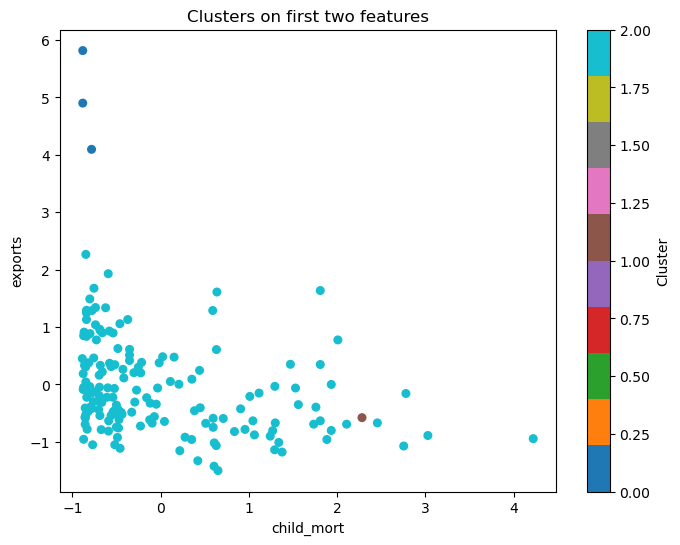

In [39]:
features = df.drop(columns=["cluster"], errors="ignore")
cols = list(features.columns)
if len(cols) < 2:
    raise ValueError("Need at least two features to plot clusters.")

x_col, y_col = cols[0], cols[1]

plt.figure(figsize=(8, 6))
plt.scatter(features[x_col], features[y_col], c=labels, cmap="tab10", s=30)
plt.title("Clusters on first two features")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.colorbar(label="Cluster")
plt.show()